In [1]:
def getLists(d):
    labels = []
    accuracy_scores = []
    balanced_accuracy_scores = []
    average_precision_scores = []
    f1_scores = []
    roc_auc_scores = []

    for label, scores in d.items():
        labels.append(label)
        for key, value in scores.items():
            if key == 'test_accuracy':
                accuracy_scores.append(value)
            if key == 'test_balanced_accuracy':
                balanced_accuracy_scores.append(value)
            if key == 'test_average_precision':
                average_precision_scores.append(value)
            if key == 'test_f1':
                f1_scores.append(value)
            if key == 'test_roc_auc':
                roc_auc_scores.append(value)
    return labels, accuracy_scores, balanced_accuracy_scores, average_precision_scores, f1_scores, roc_auc_scores

In [5]:
def plotOutput(outputFile):
    import pickle
    import os

    import matplotlib.pyplot as plt
    import seaborn as sns

    dir = 'data/' + outputFile
    for file in os.listdir(dir):
        with open(dir + '/' + file, 'rb') as fp:
            print('file: ', file)
            d = pickle.load(fp)
            labels, accuracy_scores, balanced_accuracy_scores, average_precision_scores, f1_scores, roc_auc_scores = getLists(d)

            plt.figure(figsize=(15,8))
            ax = sns.boxplot(data=roc_auc_scores)
            ax.set(xticklabels=labels)
            ax.set(xlabel='Feature Size')
            ax.set(ylabel='Model AUROC')
            ax.set(title=file)
            plt.show()

file:  cv_scores_ts_0_te_14.pickle


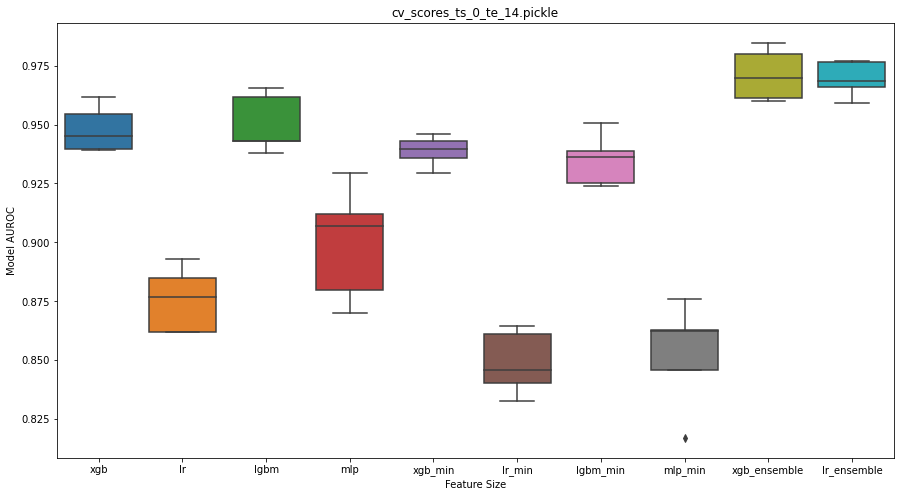

file:  cv_scores_ts_0_te_90.pickle


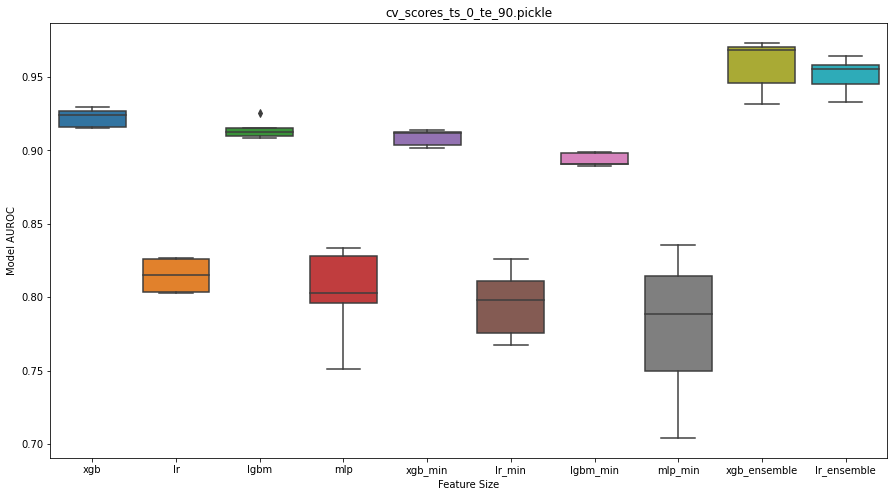

file:  cv_scores_ts_0_te_21.pickle


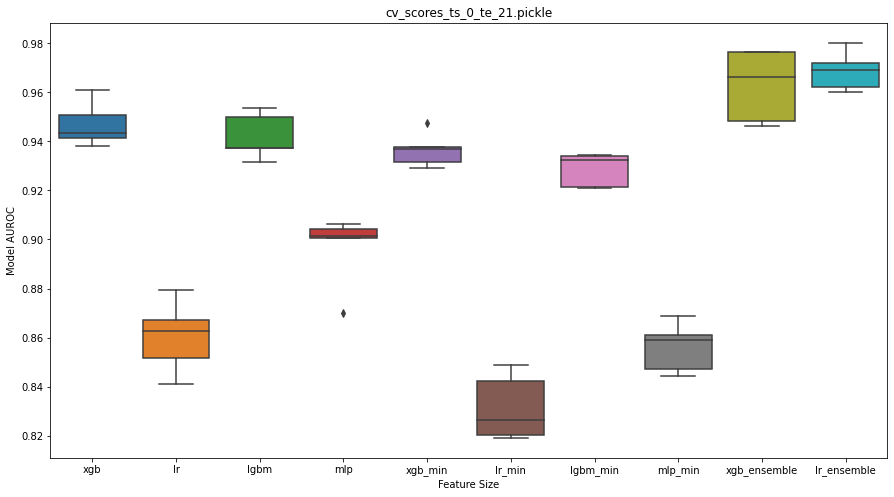

file:  cv_scores_ts_0_te_7.pickle


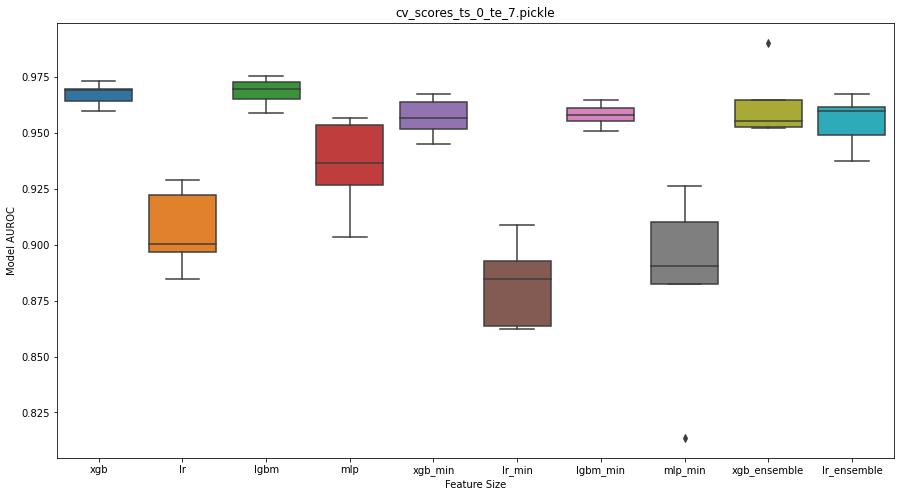

file:  cv_scores_ts_0_te_60.pickle


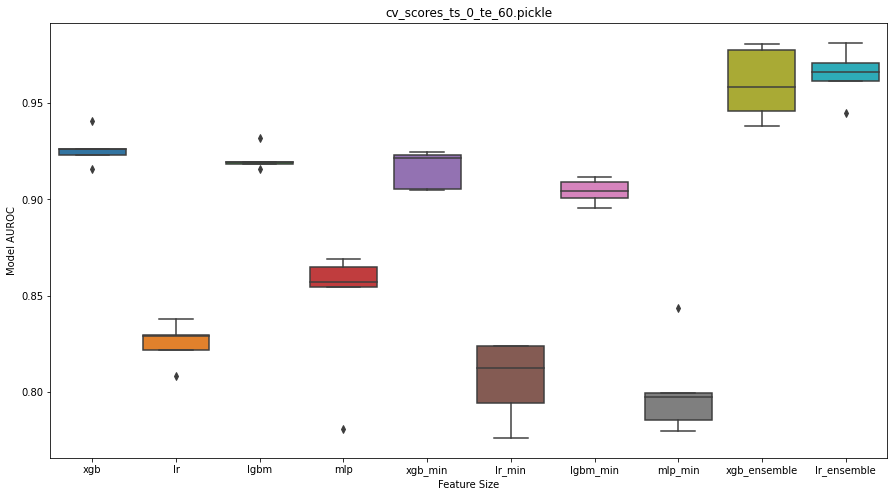

file:  cv_scores_ts_0_te_120.pickle


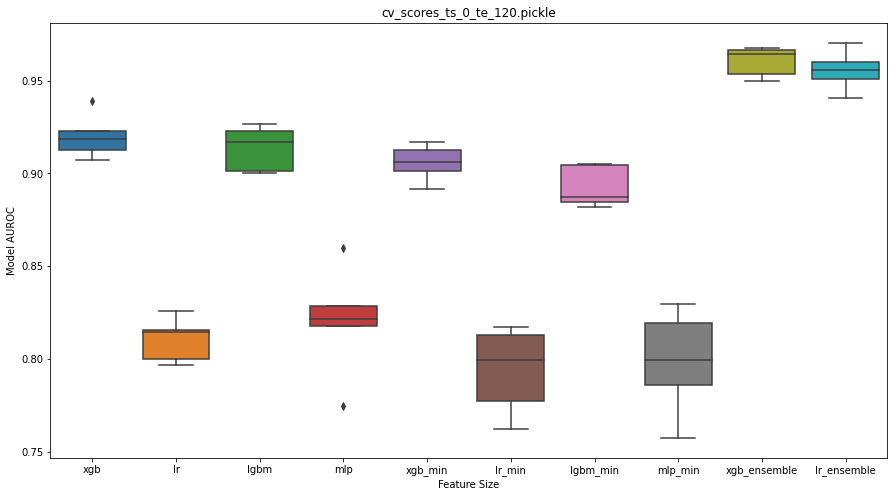

file:  cv_scores_ts_21_te_30.pickle


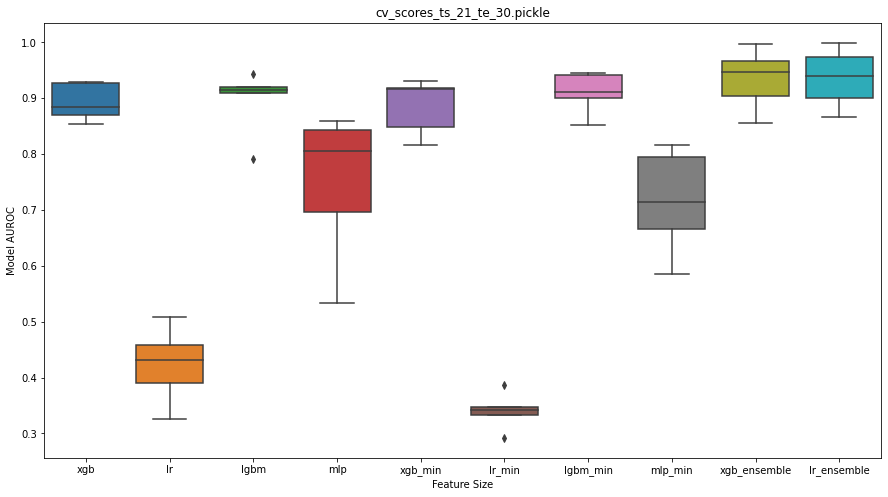

file:  cv_scores_ts_14_te_21.pickle


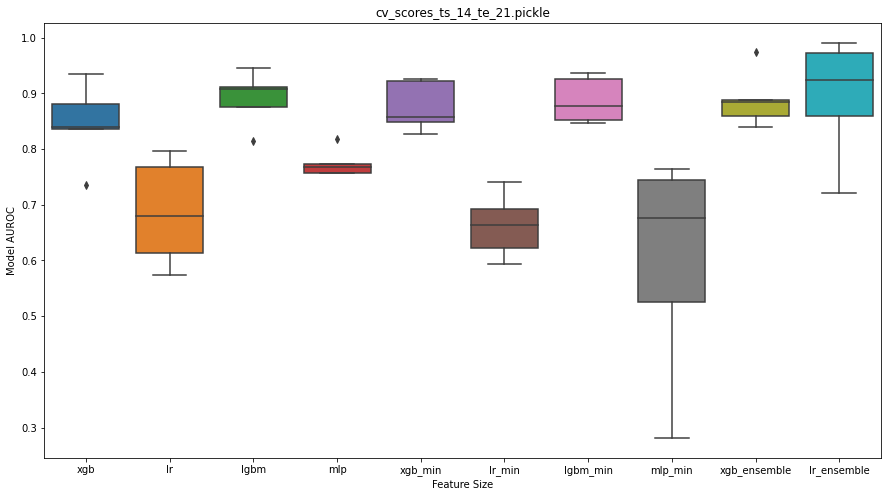

file:  cv_scores_ts_0_te_30.pickle


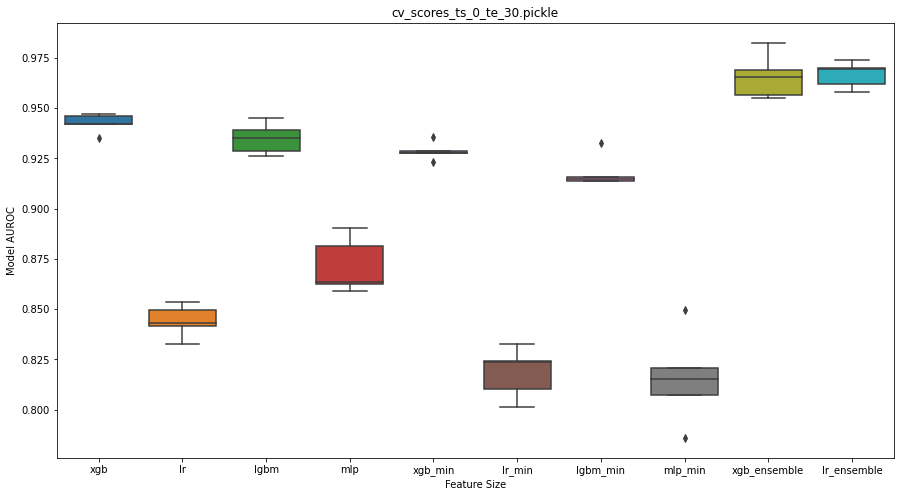

file:  cv_scores_ts_7_te_14.pickle


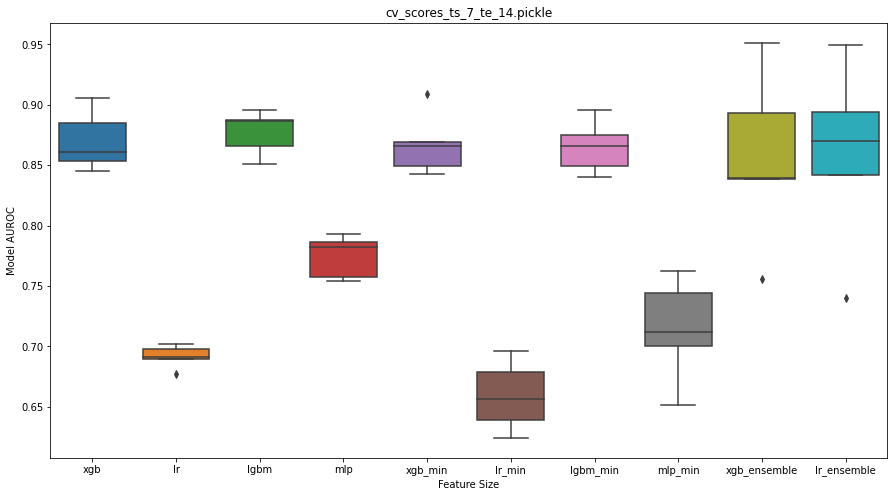

In [51]:
plotOutput('sepsis_vb_48_va_48_lb_72_la_72')

file:  cv_scores_ts_30_te_60.pickle


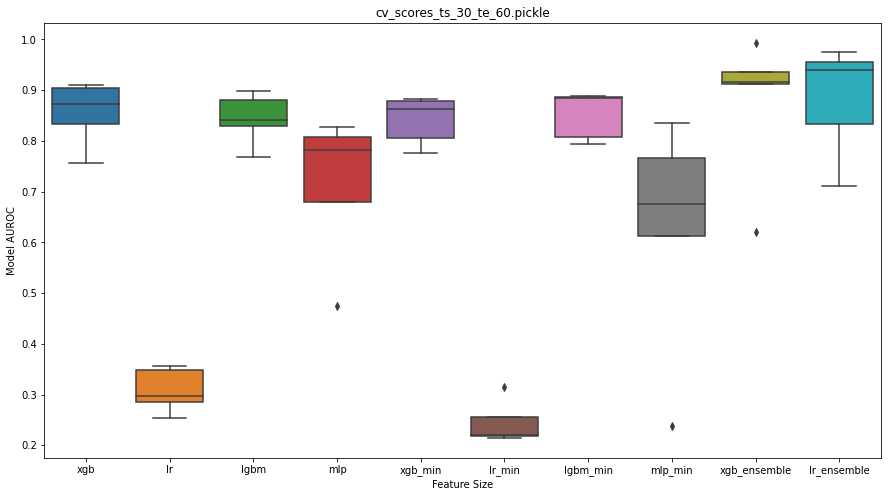

file:  cv_scores_ts_0_te_14.pickle


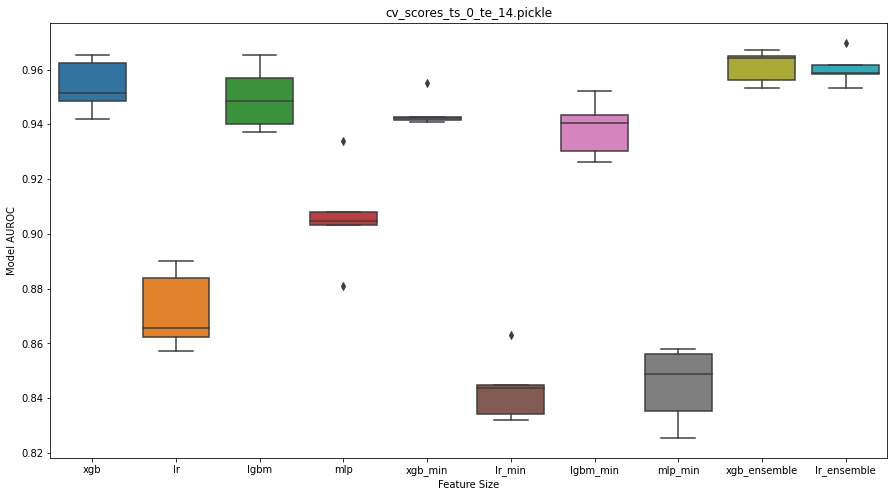

file:  cv_scores_ts_0_te_90.pickle


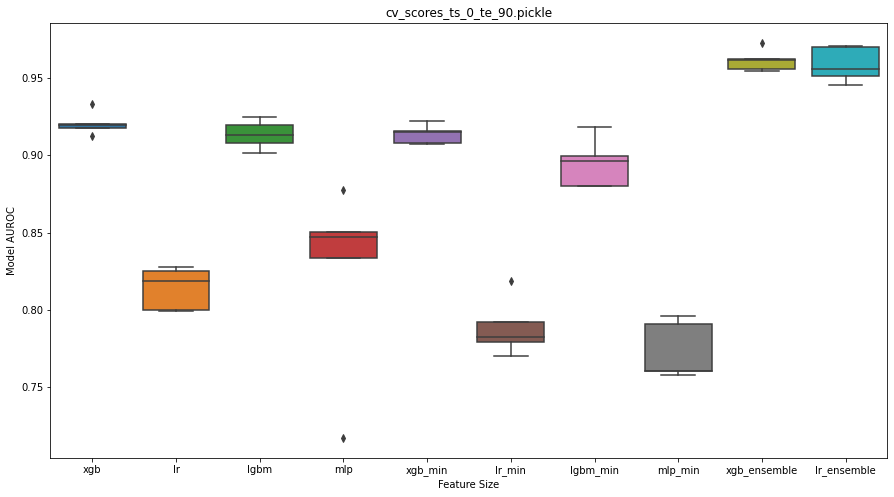

file:  cv_scores_ts_0_te_21.pickle


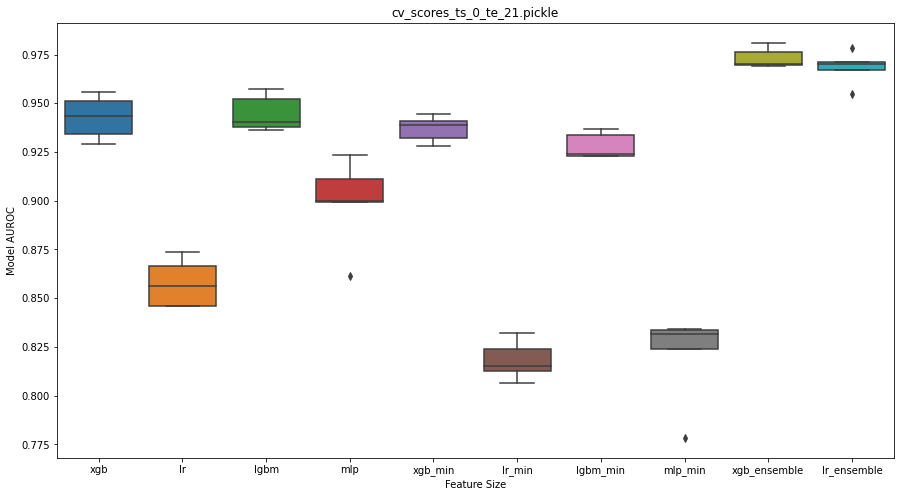

file:  cv_scores_ts_0_te_7.pickle


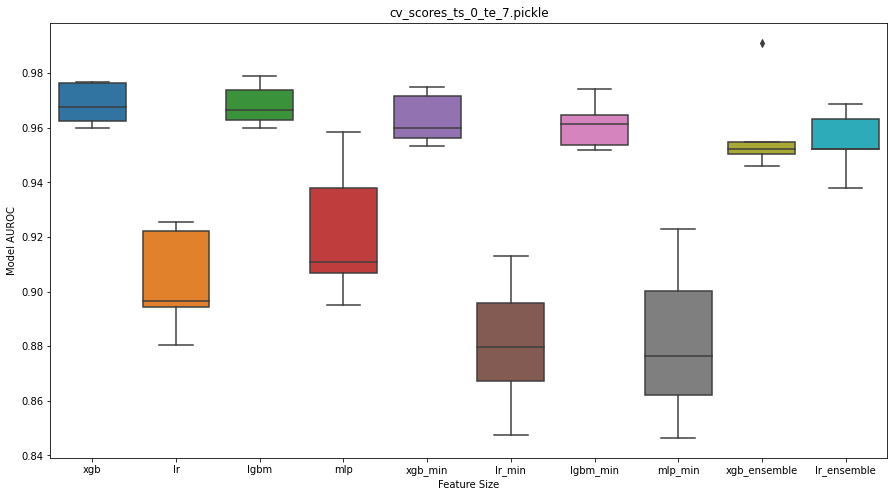

file:  cv_scores_ts_90_te_120.pickle


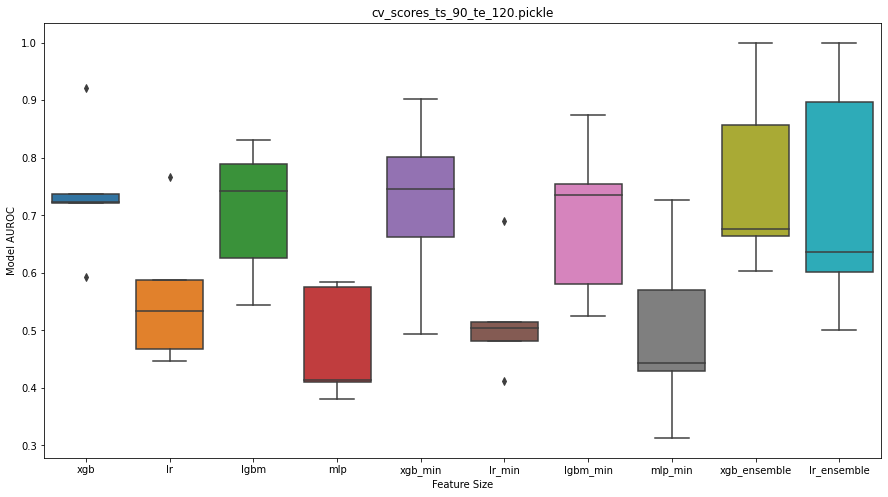

file:  cv_scores_ts_0_te_60.pickle


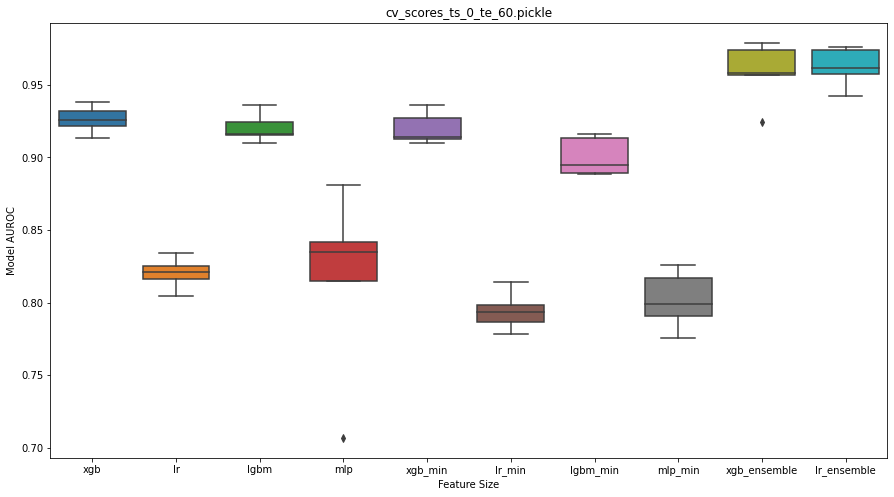

file:  cv_scores_ts_0_te_120.pickle


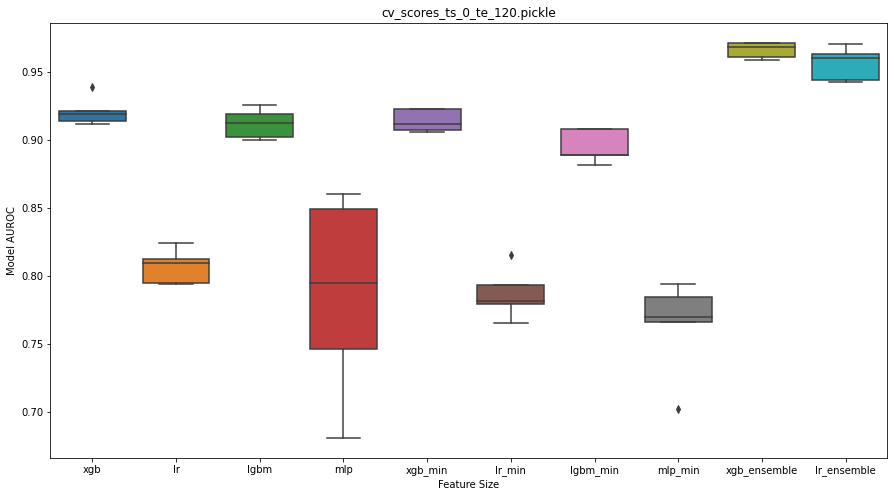

file:  cv_scores_ts_60_te_120.pickle


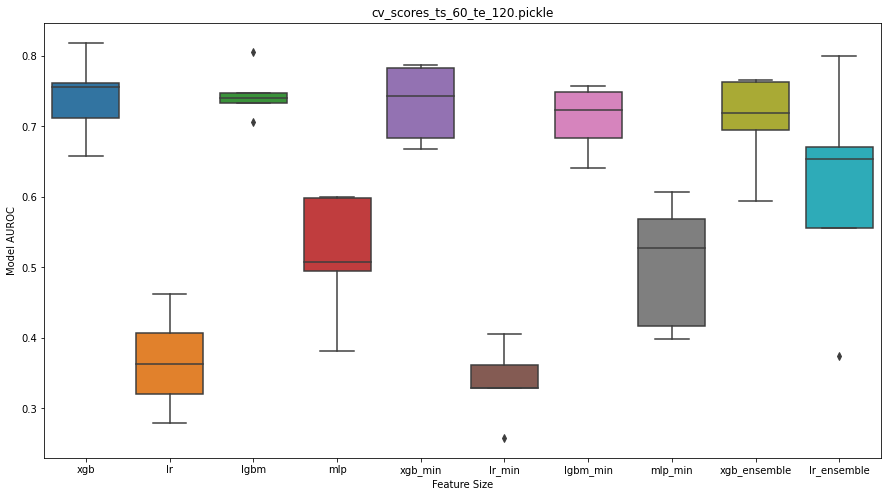

file:  cv_scores_ts_21_te_30.pickle


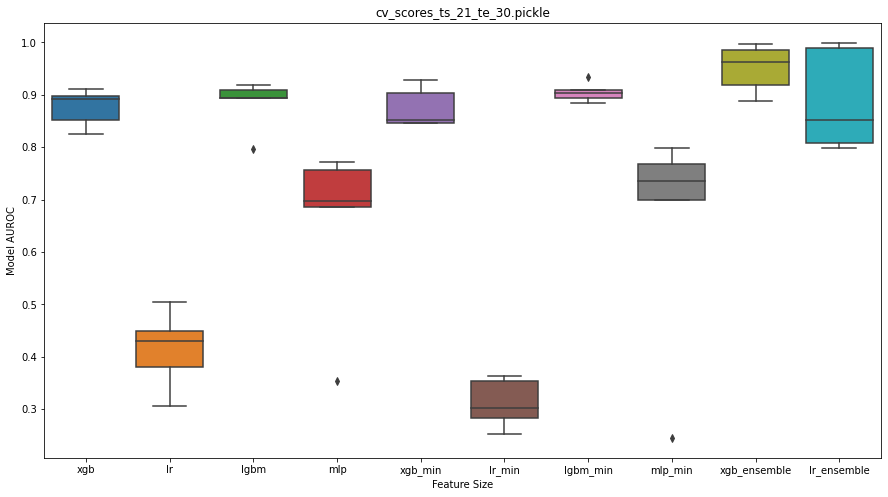

file:  cv_scores_ts_14_te_21.pickle


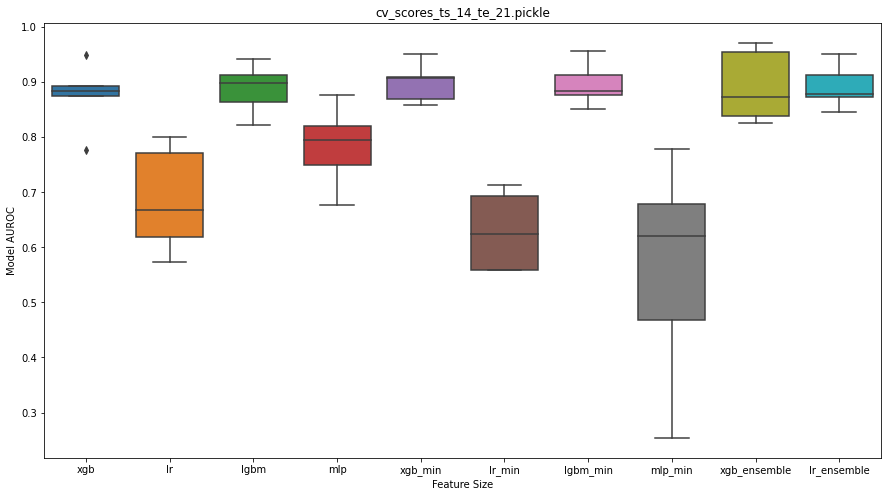

file:  cv_scores_ts_60_te_90.pickle


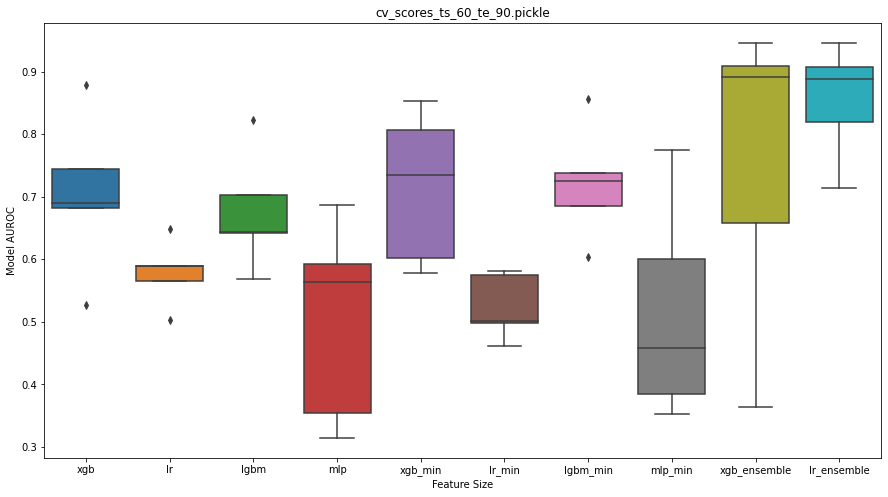

file:  cv_scores_ts_0_te_30.pickle


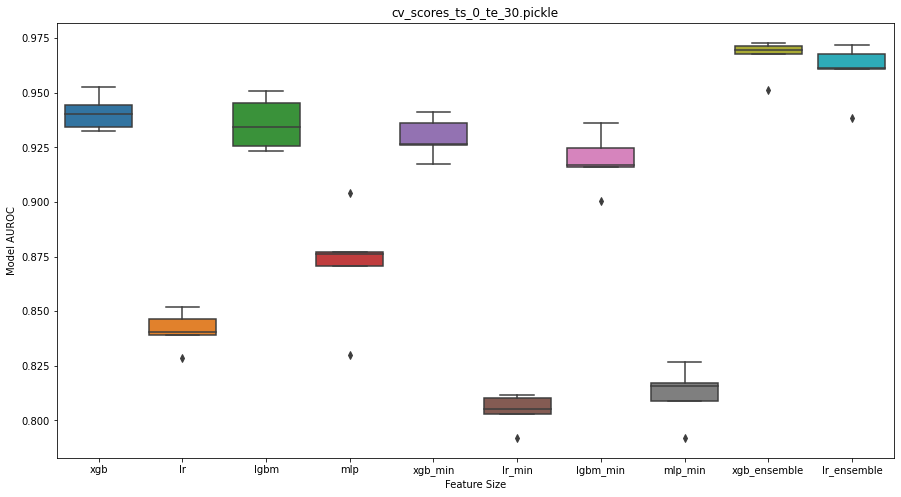

file:  cv_scores_ts_7_te_14.pickle


EOFError: Ran out of input

In [8]:
plotOutput('sepsis_vb_24_va_0_lb_24_la_0')

file:  cv_scores_ts_0_te_14.pickle


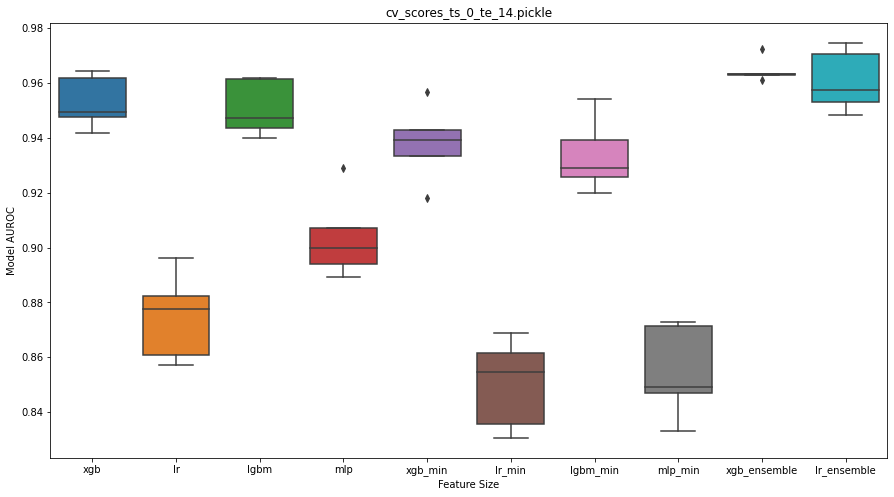

file:  cv_scores_ts_0_te_90.pickle


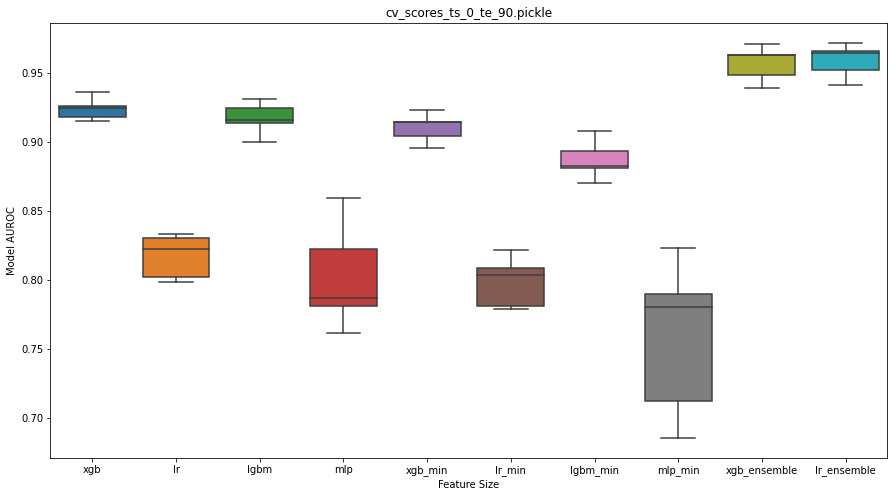

file:  cv_scores_ts_0_te_21.pickle


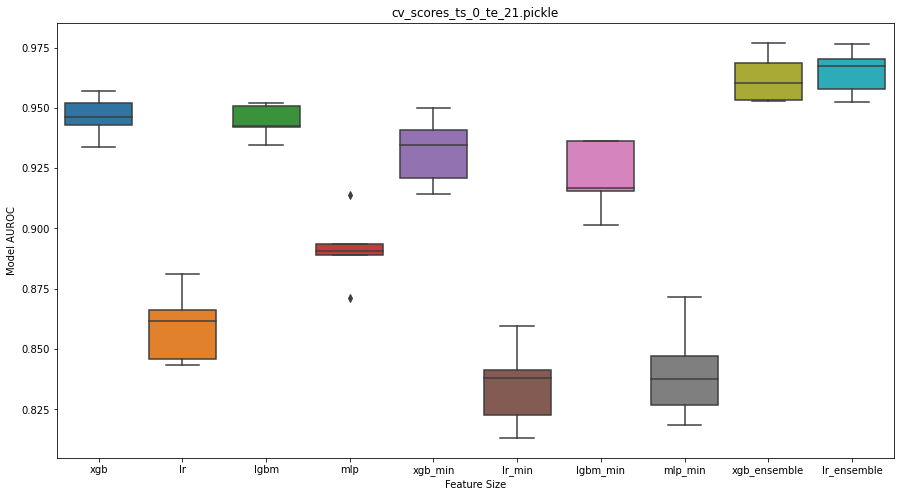

file:  cv_scores_ts_0_te_7.pickle


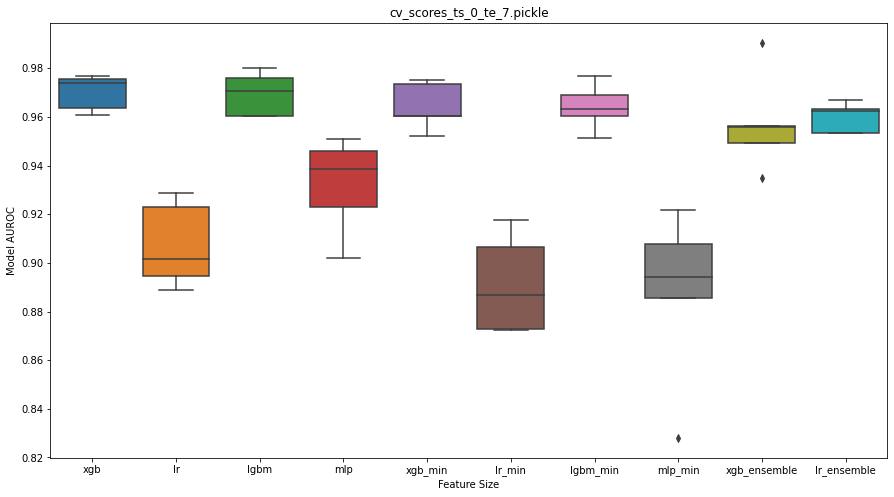

file:  cv_scores_ts_0_te_60.pickle


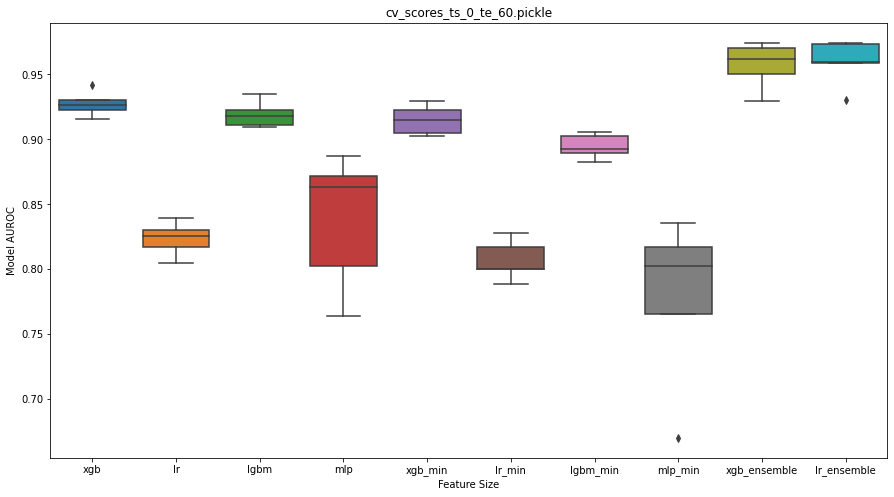

file:  cv_scores_ts_0_te_120.pickle


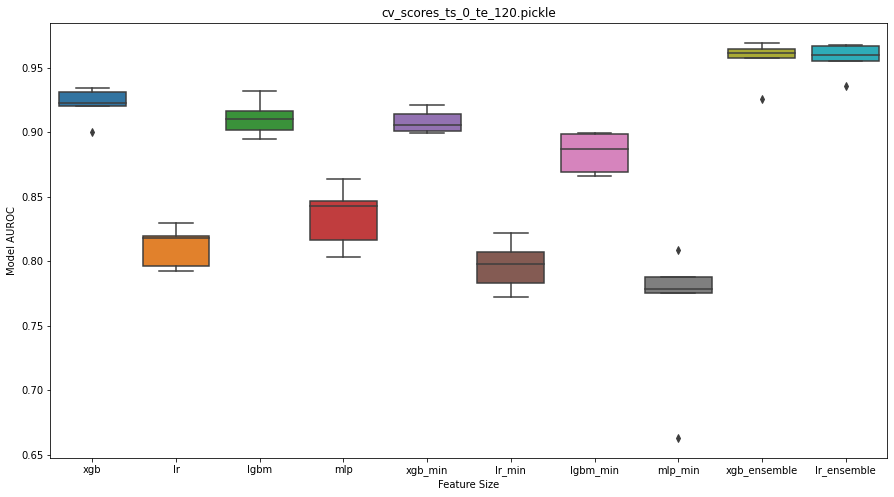

file:  cv_scores_ts_0_te_30.pickle


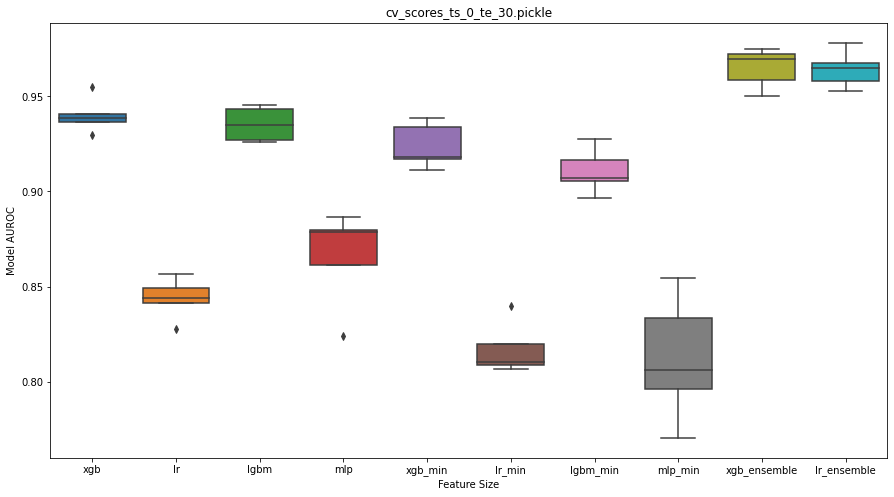

In [7]:
plotOutput('sepsis_vb_48_va_0_lb_48_la_0')

file:  cv_scores_ts_30_te_60.pickle


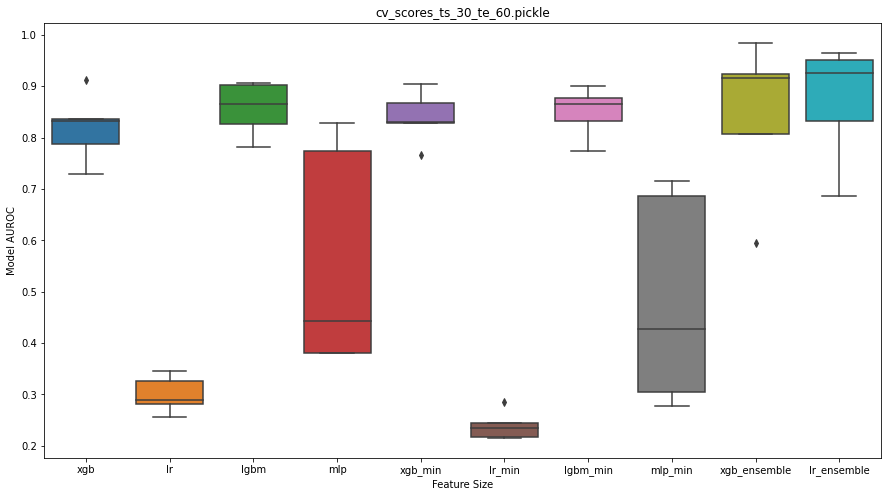

file:  cv_scores_ts_0_te_14.pickle


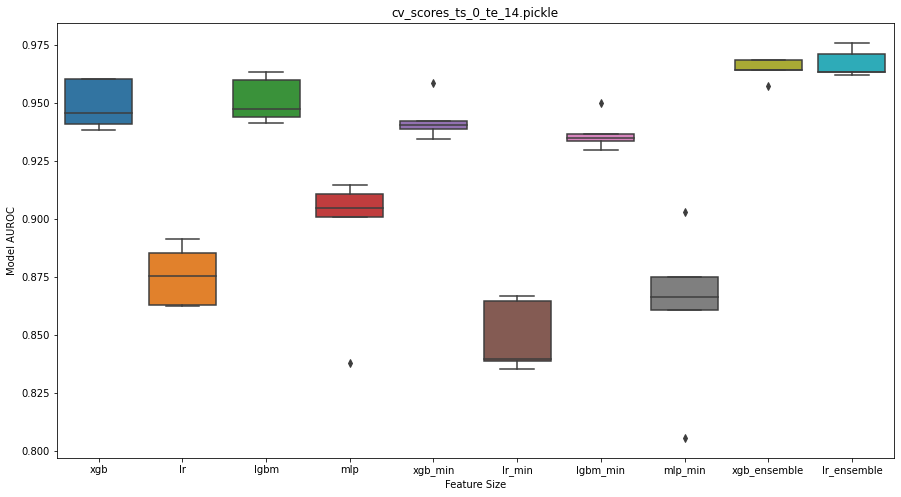

file:  cv_scores_ts_0_te_90.pickle


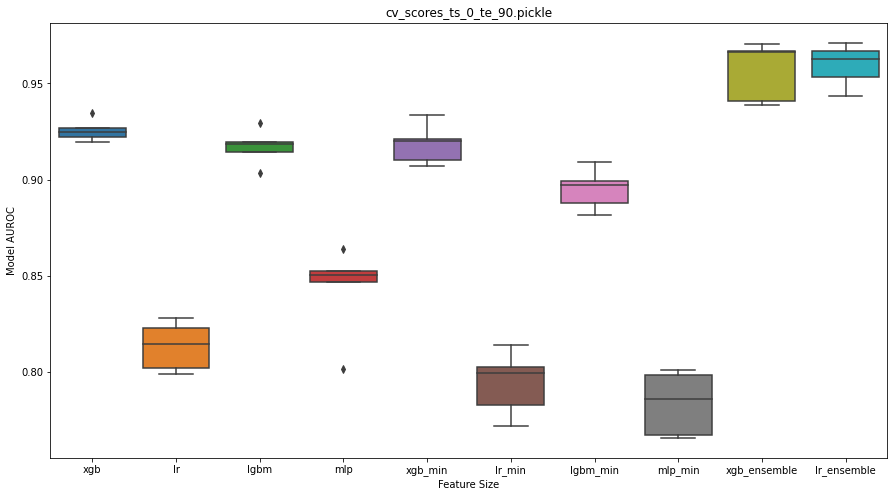

file:  cv_scores_ts_0_te_21.pickle


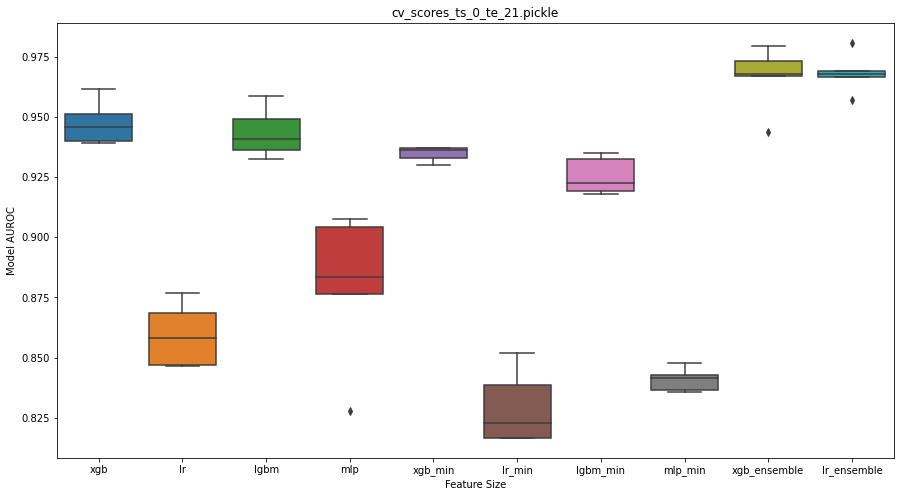

file:  cv_scores_ts_0_te_7.pickle


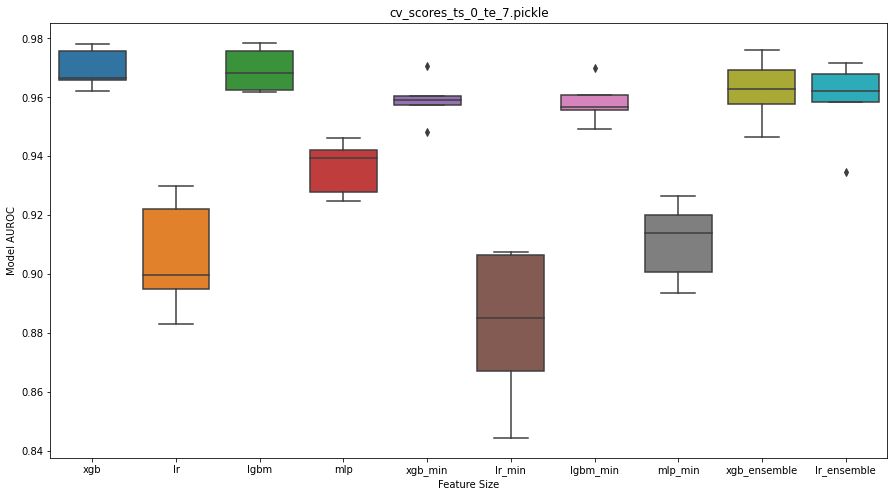

file:  cv_scores_ts_90_te_120.pickle


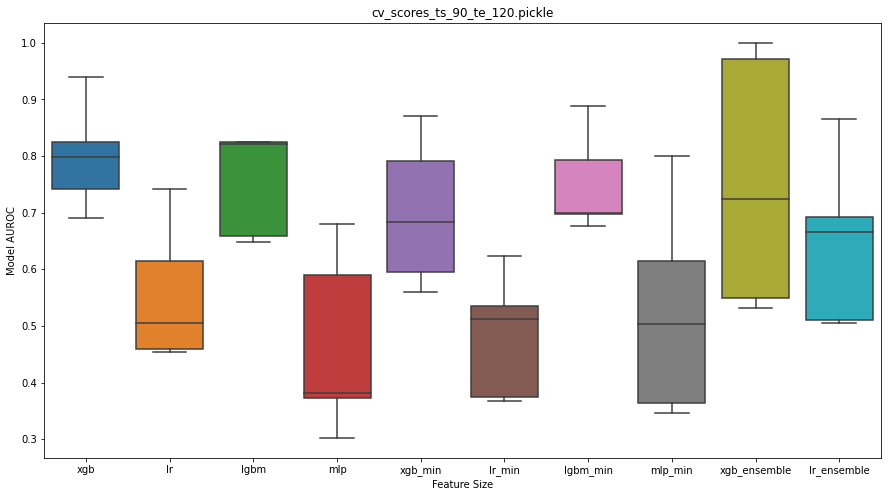

file:  cv_scores_ts_0_te_60.pickle


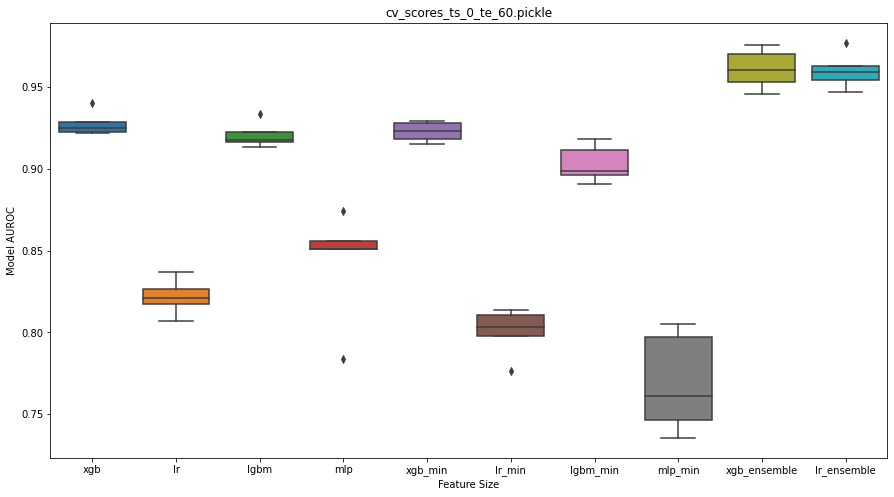

file:  cv_scores_ts_0_te_120.pickle


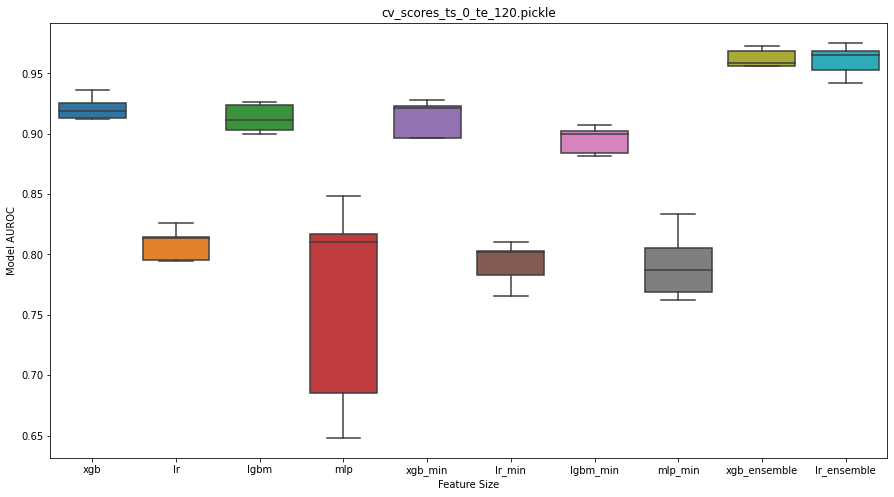

file:  cv_scores_ts_60_te_120.pickle


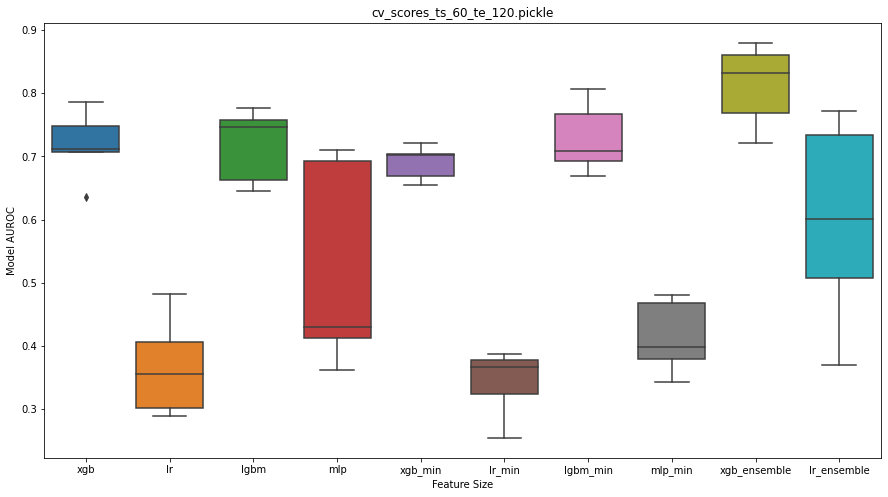

file:  cv_scores_ts_21_te_30.pickle


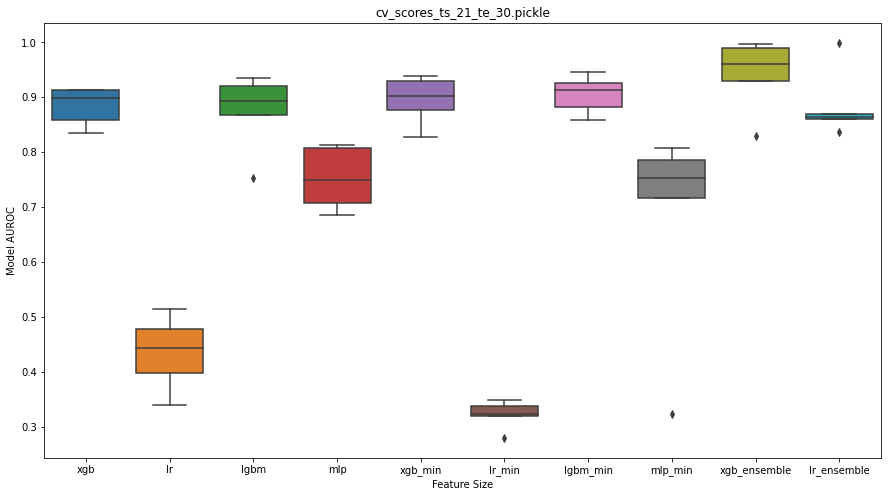

file:  cv_scores_ts_14_te_21.pickle


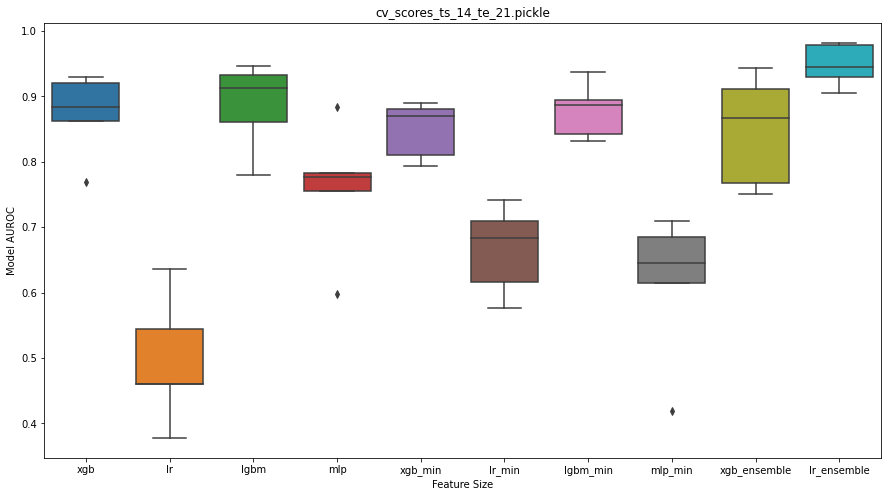

file:  cv_scores_ts_60_te_90.pickle


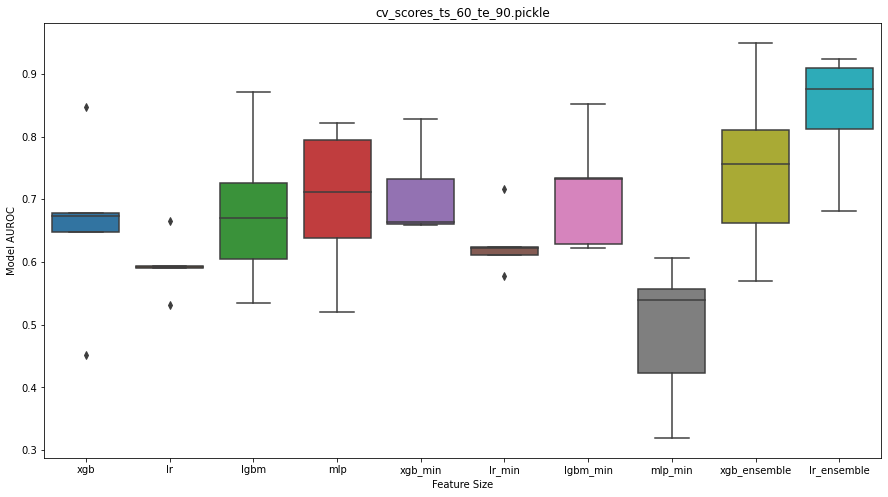

file:  cv_scores_ts_0_te_30.pickle


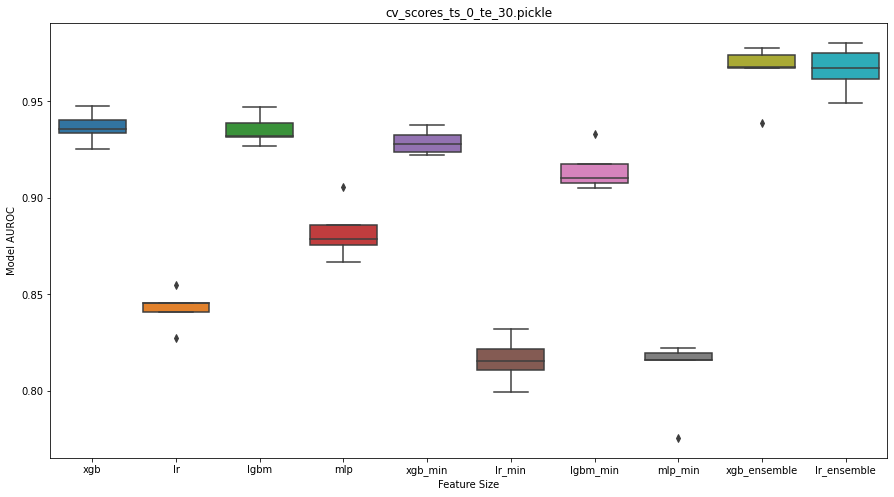

file:  cv_scores_ts_7_te_14.pickle


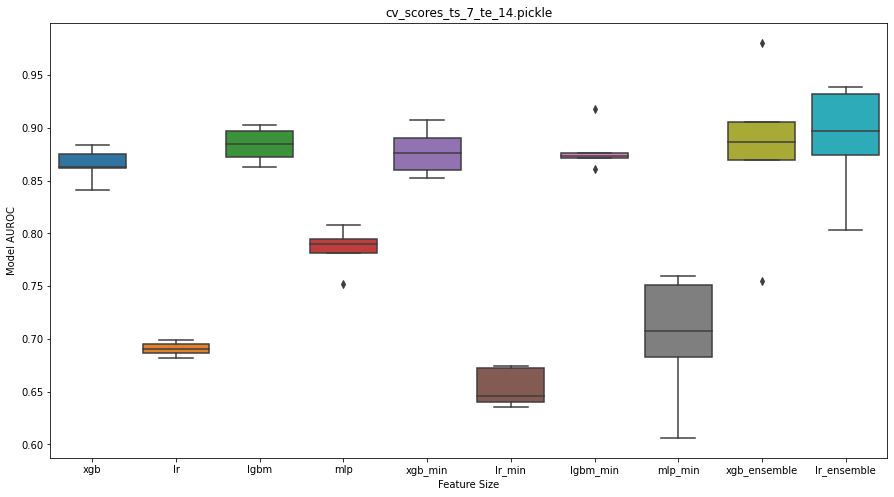

In [10]:
plotOutput('sepsis_vb_72_va_0_lb_72_la_0')

## Functions to draw comparison plots

In [247]:
def compareOutputWindows(outputFiles, modelName, windowStart = 0, windowEnd = 7):
    import pickle
    import os

    import matplotlib.pyplot as plt
    import seaborn as sns

    fileName = 'cv_scores_ts_' + str(windowStart) + '_te_' + str(windowEnd) + '.pickle'

    scores = []
    plot_labels = []

    for outputFile in outputFiles:
        dir = 'data/' + outputFile
        for file in os.listdir(dir):
            with open(dir + '/' + file, 'rb') as fp:
                if file == fileName:
                    try:
                        d = pickle.load(fp)
                        labels, _, _, _, _, roc_auc_scores = getLists(d)
                        scores.append(roc_auc_scores[labels.index(modelName)])
                        fileNameSplitArray = outputFile.split('_')
                        plot_labels.append(fileNameSplitArray[2] + '_' + fileNameSplitArray[4] + '_' + fileNameSplitArray[6] + '_' + fileNameSplitArray[8])
                    except:
                        pass

    fig, ax = plt.subplots(1, figsize=(15,10))
    fig.suptitle('Comparison plots for window: [' + str(windowStart) + ', ' + str(windowEnd) + ']')

    ax.boxplot(x=scores)
    ax.set(xticklabels=plot_labels)
    ax.set(xlabel='Feature Size')
    ax.set(ylabel='Model: ' + modelName)
    ax.set(title='XGB Ensemble')

    plt.show()

In [235]:
def compareOutputModels(outputFiles, windowStart = 0, windowEnd = 7):
    import pickle
    import os

    import matplotlib.pyplot as plt
    import seaborn as sns

    fileName = 'cv_scores_ts_' + str(windowStart) + '_te_' + str(windowEnd) + '.pickle'

    scores = []
    groups = []
    plot_labels = []

    for outputFile in outputFiles:
        dir = 'data/' + outputFile
        for file in os.listdir(dir):
            with open(dir + '/' + file, 'rb') as fp:
                if file == fileName:
                    try:
                        d = pickle.load(fp)
                        labels, _, _, _, _, roc_auc_scores = getLists(d)
                        scores.extend(roc_auc_scores[labels.index('xgb_ensemble')])
                        scores.extend(roc_auc_scores[labels.index('xgb')])
                        groups.extend(['XGB_ENSEMBLE'] * len(roc_auc_scores[labels.index('xgb_ensemble')]))
                        groups.extend(['XGB'] * len(roc_auc_scores[labels.index('xgb')]))
                        fileNameSplitArray = outputFile.split('_')
                        label = fileNameSplitArray[2] + '_' + fileNameSplitArray[4] + '_' + fileNameSplitArray[6] + '_' + fileNameSplitArray[8]
                        plot_labels.extend([label] * (len(roc_auc_scores[labels.index('xgb_ensemble')]) + len(roc_auc_scores[labels.index('xgb')])))
                    except:
                        pass

    plt.figure(figsize=(15,8))
    sns.boxplot(y = scores, hue = groups, x = plot_labels)

    plt.show()

## Seven Day mortality prediction comparison

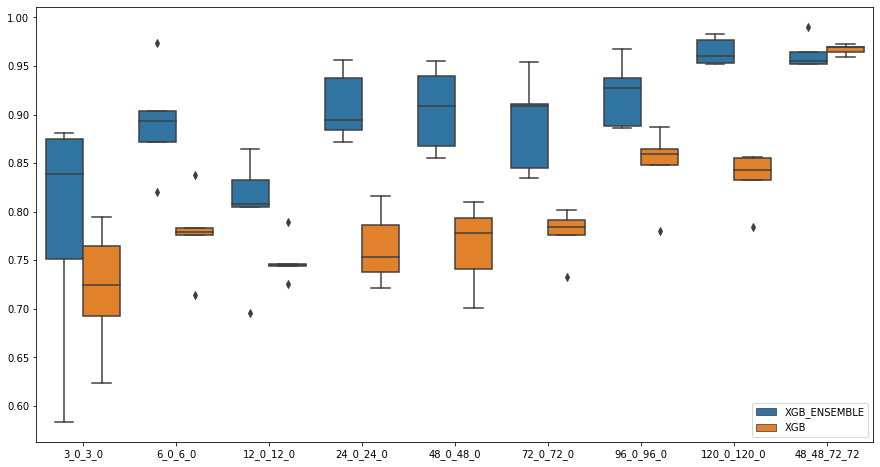

In [270]:
compareOutputModels(
    [
        'sepsis_vb_3_va_0_lb_3_la_0',
        'sepsis_vb_6_va_0_lb_6_la_0',
        'sepsis_vb_12_va_0_lb_12_la_0',
        'sepsis_vb_24_va_0_lb_24_la_0',
        'sepsis_vb_48_va_0_lb_48_la_0',
        'sepsis_vb_72_va_0_lb_72_la_0',
        'sepsis_vb_96_va_0_lb_96_la_0',
        'sepsis_vb_120_va_0_lb_120_la_0',
        'sepsis_vb_48_va_48_lb_72_la_72'
    ],
    windowStart = 0,
    windowEnd = 7
)

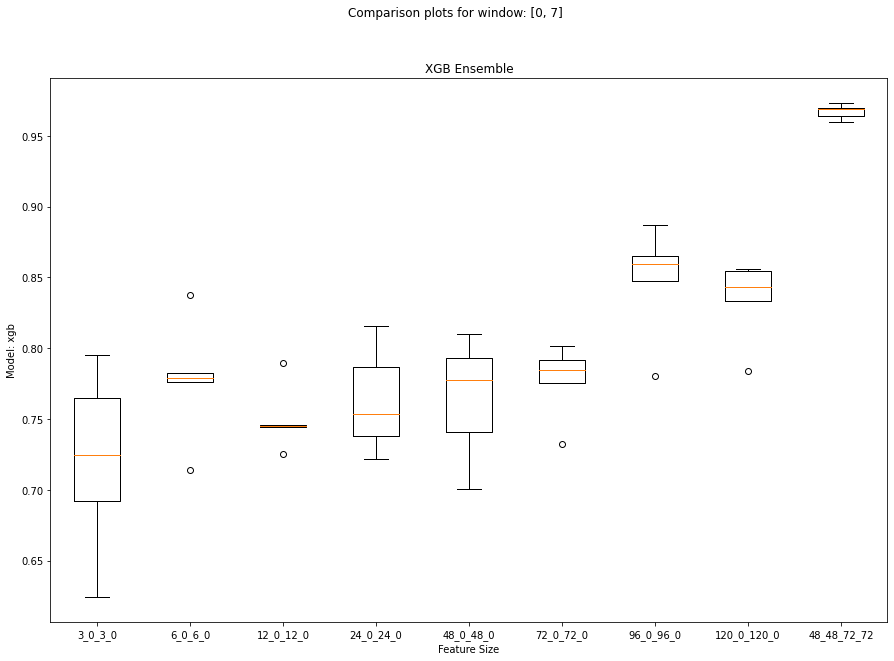

In [254]:
compareOutputWindows(
    [
        'sepsis_vb_3_va_0_lb_3_la_0',
        'sepsis_vb_6_va_0_lb_6_la_0',
        'sepsis_vb_12_va_0_lb_12_la_0',
        'sepsis_vb_24_va_0_lb_24_la_0',
        'sepsis_vb_48_va_0_lb_48_la_0',
        'sepsis_vb_72_va_0_lb_72_la_0',
        'sepsis_vb_96_va_0_lb_96_la_0',
        'sepsis_vb_120_va_0_lb_120_la_0',
        'sepsis_vb_48_va_48_lb_72_la_72'
    ],
    'xgb',
    windowStart = 0,
    windowEnd = 7
)

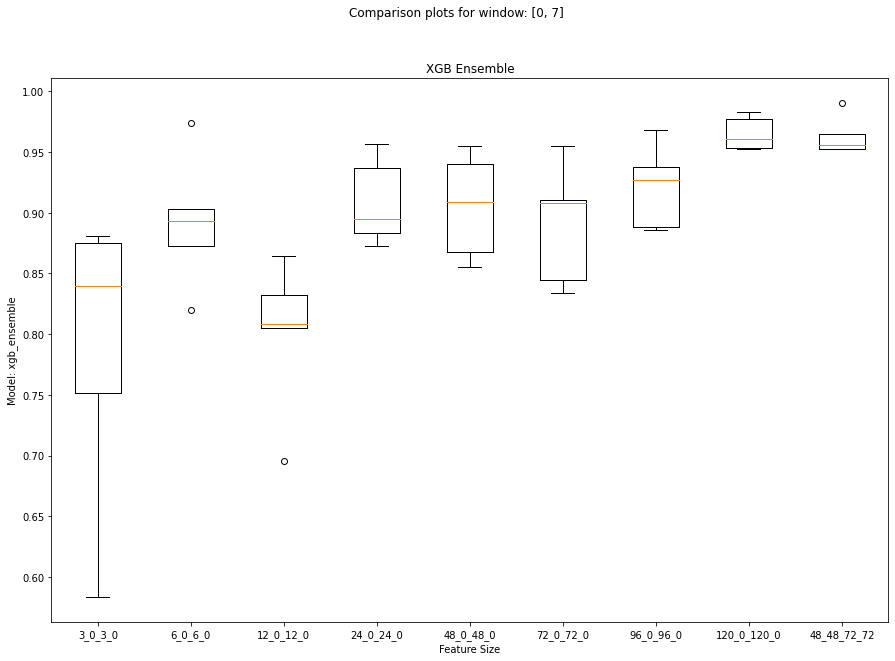

In [255]:
compareOutputWindows(
    [
        'sepsis_vb_3_va_0_lb_3_la_0',
        'sepsis_vb_6_va_0_lb_6_la_0',
        'sepsis_vb_12_va_0_lb_12_la_0',
        'sepsis_vb_24_va_0_lb_24_la_0',
        'sepsis_vb_48_va_0_lb_48_la_0',
        'sepsis_vb_72_va_0_lb_72_la_0',
        'sepsis_vb_96_va_0_lb_96_la_0',
        'sepsis_vb_120_va_0_lb_120_la_0',
        'sepsis_vb_48_va_48_lb_72_la_72'
    ],
    'xgb_ensemble',
    windowStart = 0,
    windowEnd = 7
)

## Fourteen Day mortality prediction comparison

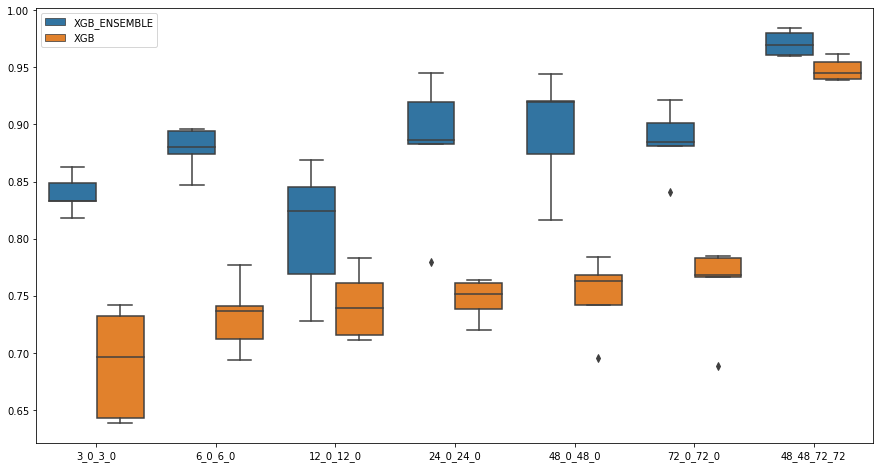

In [256]:
compareOutputModels(
    [
        'sepsis_vb_3_va_0_lb_3_la_0',
        'sepsis_vb_6_va_0_lb_6_la_0',
        'sepsis_vb_12_va_0_lb_12_la_0',
        'sepsis_vb_24_va_0_lb_24_la_0',
        'sepsis_vb_48_va_0_lb_48_la_0',
        'sepsis_vb_72_va_0_lb_72_la_0',
        'sepsis_vb_96_va_0_lb_96_la_0',
        'sepsis_vb_120_va_0_lb_120_la_0',
        'sepsis_vb_48_va_48_lb_72_la_72'
    ],
    windowStart = 0,
    windowEnd = 14
)

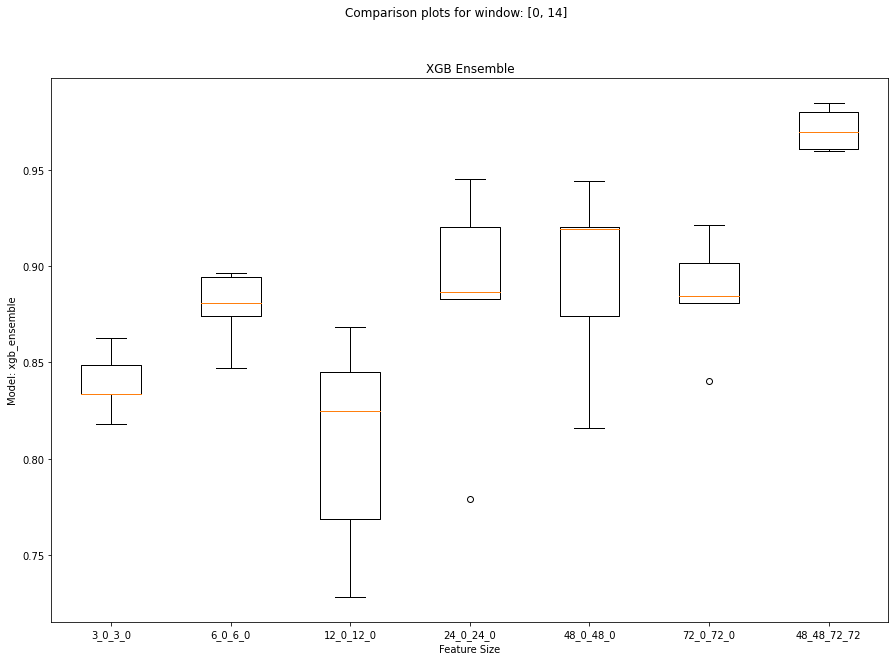

In [257]:
compareOutputWindows(
    [
        'sepsis_vb_3_va_0_lb_3_la_0',
        'sepsis_vb_6_va_0_lb_6_la_0',
        'sepsis_vb_12_va_0_lb_12_la_0',
        'sepsis_vb_24_va_0_lb_24_la_0',
        'sepsis_vb_48_va_0_lb_48_la_0',
        'sepsis_vb_72_va_0_lb_72_la_0',
        'sepsis_vb_96_va_0_lb_96_la_0',
        'sepsis_vb_120_va_0_lb_120_la_0',
        'sepsis_vb_48_va_48_lb_72_la_72'
    ],
    'xgb_ensemble',
    windowStart = 0,
    windowEnd = 14
)

## Twentyone Day mortality prediction comparison

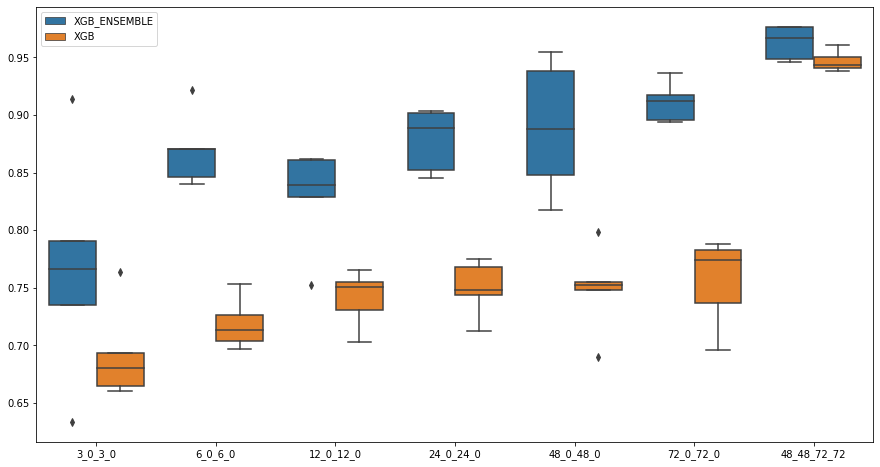

In [258]:
compareOutputModels(
    [
        'sepsis_vb_3_va_0_lb_3_la_0',
        'sepsis_vb_6_va_0_lb_6_la_0',
        'sepsis_vb_12_va_0_lb_12_la_0',
        'sepsis_vb_24_va_0_lb_24_la_0',
        'sepsis_vb_48_va_0_lb_48_la_0',
        'sepsis_vb_72_va_0_lb_72_la_0',
        'sepsis_vb_96_va_0_lb_96_la_0',
        'sepsis_vb_120_va_0_lb_120_la_0',
        'sepsis_vb_48_va_48_lb_72_la_72'
    ],
    windowStart = 0,
    windowEnd = 21
)

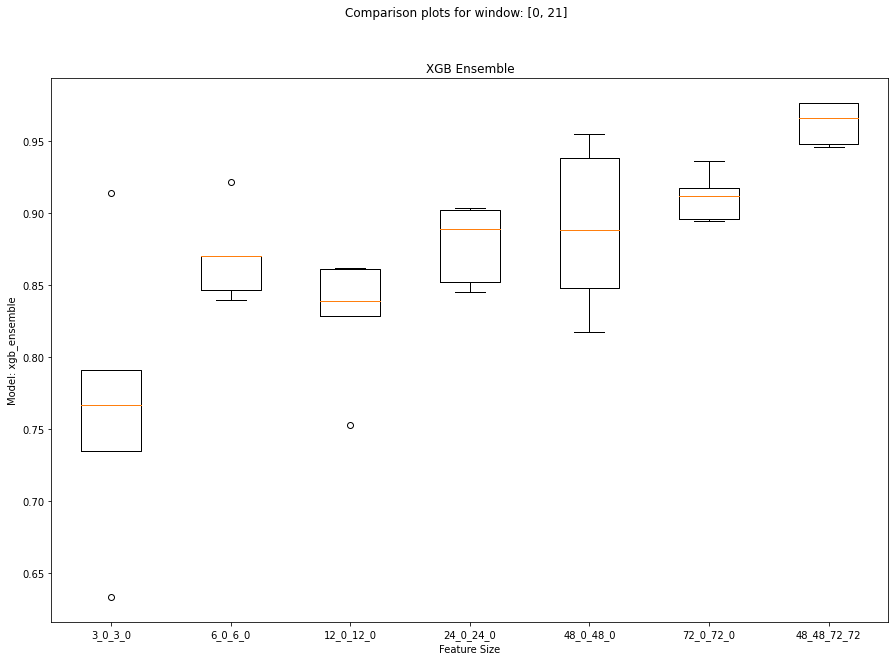

In [259]:
compareOutputWindows(
    [
        'sepsis_vb_3_va_0_lb_3_la_0',
        'sepsis_vb_6_va_0_lb_6_la_0',
        'sepsis_vb_12_va_0_lb_12_la_0',
        'sepsis_vb_24_va_0_lb_24_la_0',
        'sepsis_vb_48_va_0_lb_48_la_0',
        'sepsis_vb_72_va_0_lb_72_la_0',
        'sepsis_vb_96_va_0_lb_96_la_0',
        'sepsis_vb_120_va_0_lb_120_la_0',
        'sepsis_vb_48_va_48_lb_72_la_72'
    ],
    'xgb_ensemble',
    windowStart = 0,
    windowEnd = 21
)

## Thirty Day mortality prediction comparison

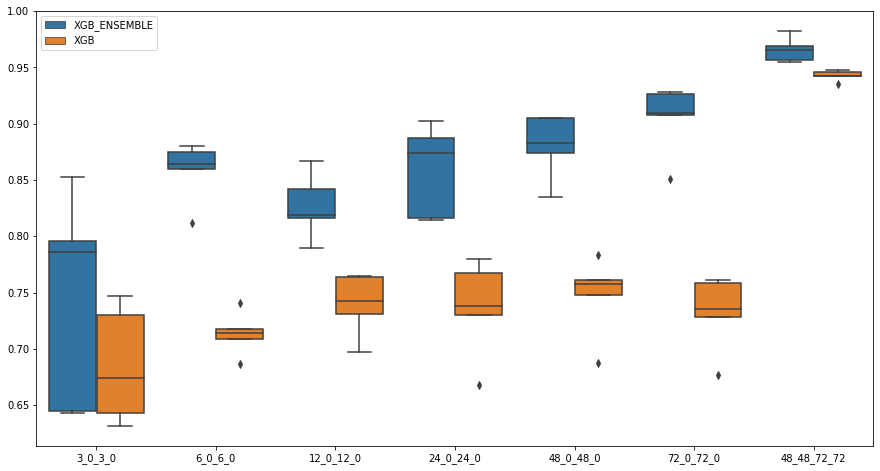

In [261]:
compareOutputModels(
    [
        'sepsis_vb_3_va_0_lb_3_la_0',
        'sepsis_vb_6_va_0_lb_6_la_0',
        'sepsis_vb_12_va_0_lb_12_la_0',
        'sepsis_vb_24_va_0_lb_24_la_0',
        'sepsis_vb_48_va_0_lb_48_la_0',
        'sepsis_vb_72_va_0_lb_72_la_0',
        'sepsis_vb_96_va_0_lb_96_la_0',
        'sepsis_vb_120_va_0_lb_120_la_0',
        'sepsis_vb_48_va_48_lb_72_la_72'
    ],
    windowStart = 0,
    windowEnd = 30
)

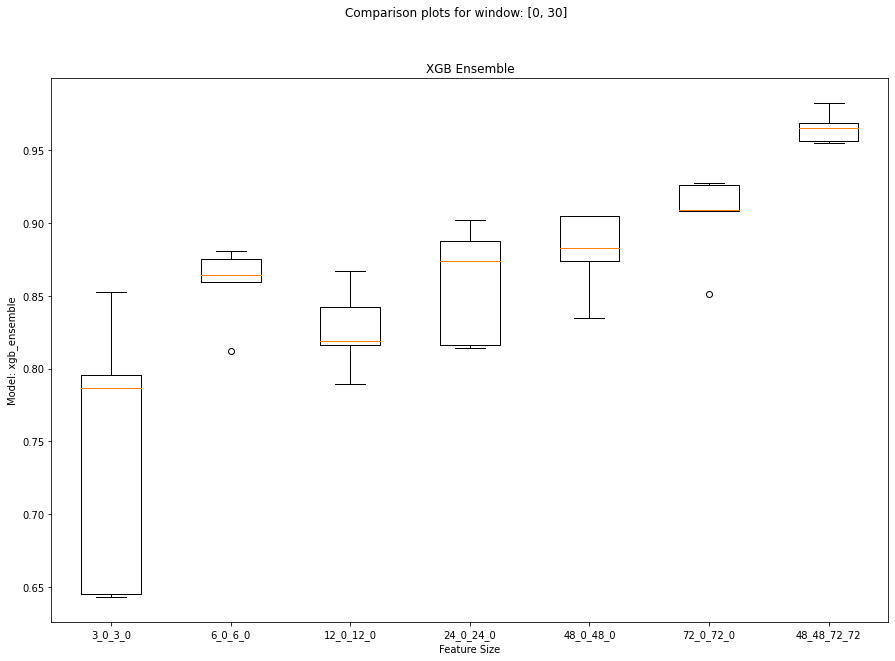

In [262]:
compareOutputWindows(
    [
        'sepsis_vb_3_va_0_lb_3_la_0',
        'sepsis_vb_6_va_0_lb_6_la_0',
        'sepsis_vb_12_va_0_lb_12_la_0',
        'sepsis_vb_24_va_0_lb_24_la_0',
        'sepsis_vb_48_va_0_lb_48_la_0',
        'sepsis_vb_72_va_0_lb_72_la_0',
        'sepsis_vb_96_va_0_lb_96_la_0',
        'sepsis_vb_120_va_0_lb_120_la_0',
        'sepsis_vb_48_va_48_lb_72_la_72'
    ],
    'xgb_ensemble',
    windowStart = 0,
    windowEnd = 30
)

## Sixty Day mortality prediction comparison

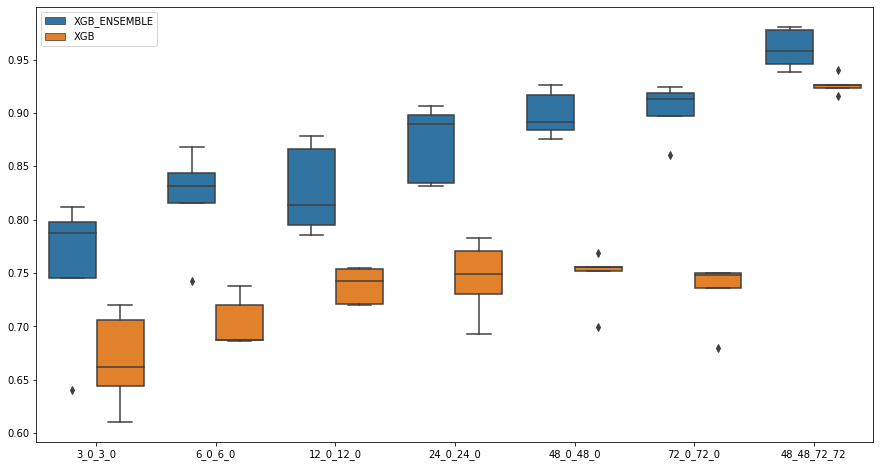

In [263]:
compareOutputModels(
    [
        'sepsis_vb_3_va_0_lb_3_la_0',
        'sepsis_vb_6_va_0_lb_6_la_0',
        'sepsis_vb_12_va_0_lb_12_la_0',
        'sepsis_vb_24_va_0_lb_24_la_0',
        'sepsis_vb_48_va_0_lb_48_la_0',
        'sepsis_vb_72_va_0_lb_72_la_0',
        'sepsis_vb_96_va_0_lb_96_la_0',
        'sepsis_vb_120_va_0_lb_120_la_0',
        'sepsis_vb_48_va_48_lb_72_la_72'
    ],
    windowStart = 0,
    windowEnd = 60
)

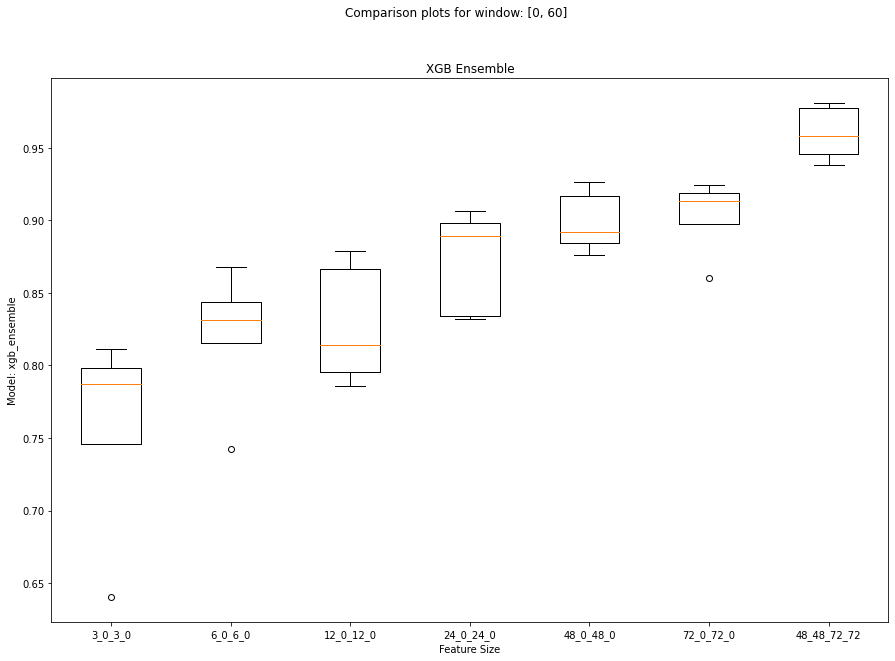

In [264]:
compareOutputWindows(
    [
        'sepsis_vb_3_va_0_lb_3_la_0',
        'sepsis_vb_6_va_0_lb_6_la_0',
        'sepsis_vb_12_va_0_lb_12_la_0',
        'sepsis_vb_24_va_0_lb_24_la_0',
        'sepsis_vb_48_va_0_lb_48_la_0',
        'sepsis_vb_72_va_0_lb_72_la_0',
        'sepsis_vb_96_va_0_lb_96_la_0',
        'sepsis_vb_120_va_0_lb_120_la_0',
        'sepsis_vb_48_va_48_lb_72_la_72'
    ],
    'xgb_ensemble',
    windowStart = 0,
    windowEnd = 60
)

## Ninety Day mortality prediction comparison

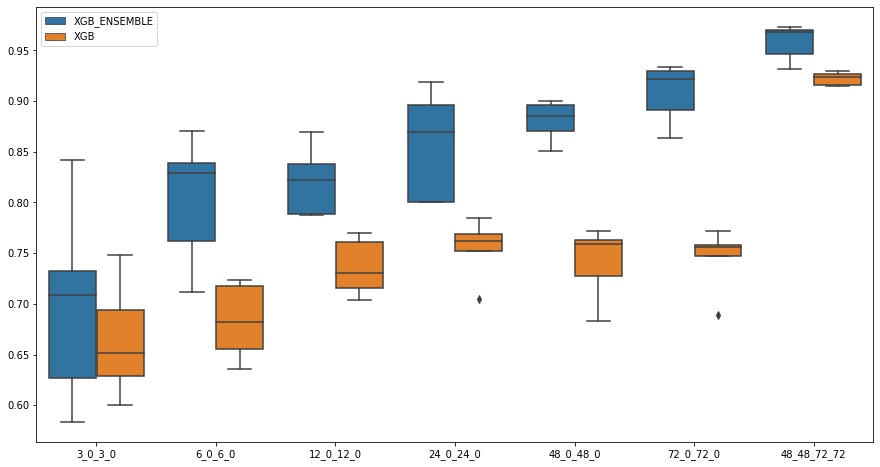

In [265]:
compareOutputModels(
    [
        'sepsis_vb_3_va_0_lb_3_la_0',
        'sepsis_vb_6_va_0_lb_6_la_0',
        'sepsis_vb_12_va_0_lb_12_la_0',
        'sepsis_vb_24_va_0_lb_24_la_0',
        'sepsis_vb_48_va_0_lb_48_la_0',
        'sepsis_vb_72_va_0_lb_72_la_0',
        'sepsis_vb_96_va_0_lb_96_la_0',
        'sepsis_vb_120_va_0_lb_120_la_0',
        'sepsis_vb_48_va_48_lb_72_la_72'
    ],
    windowStart = 0,
    windowEnd = 90
)

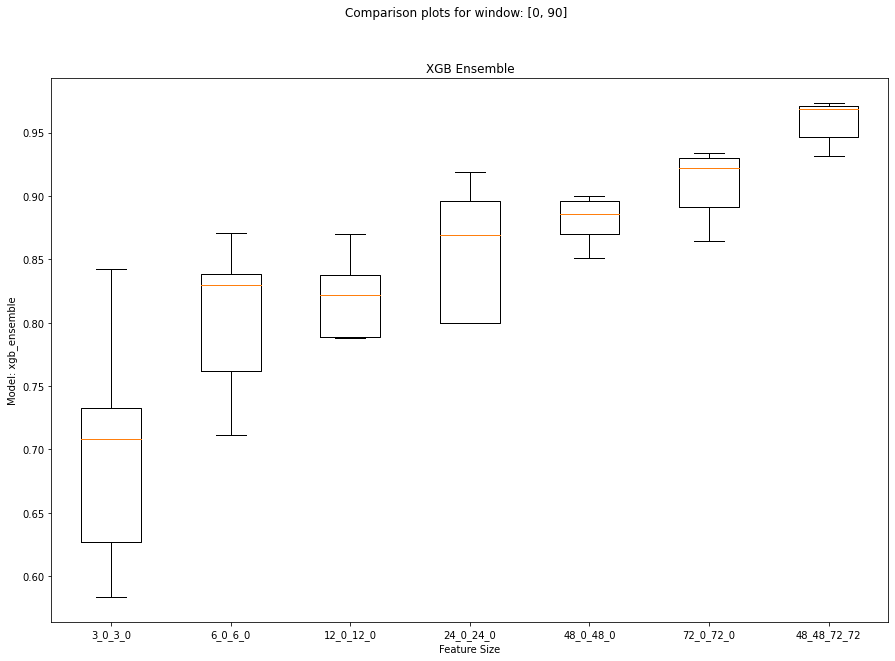

In [266]:
compareOutputWindows(
    [
        'sepsis_vb_3_va_0_lb_3_la_0',
        'sepsis_vb_6_va_0_lb_6_la_0',
        'sepsis_vb_12_va_0_lb_12_la_0',
        'sepsis_vb_24_va_0_lb_24_la_0',
        'sepsis_vb_48_va_0_lb_48_la_0',
        'sepsis_vb_72_va_0_lb_72_la_0',
        'sepsis_vb_96_va_0_lb_96_la_0',
        'sepsis_vb_120_va_0_lb_120_la_0',
        'sepsis_vb_48_va_48_lb_72_la_72'
    ],
    'xgb_ensemble',
    windowStart = 0,
    windowEnd = 90
)

## Onetwenty Day mortality prediction comparison

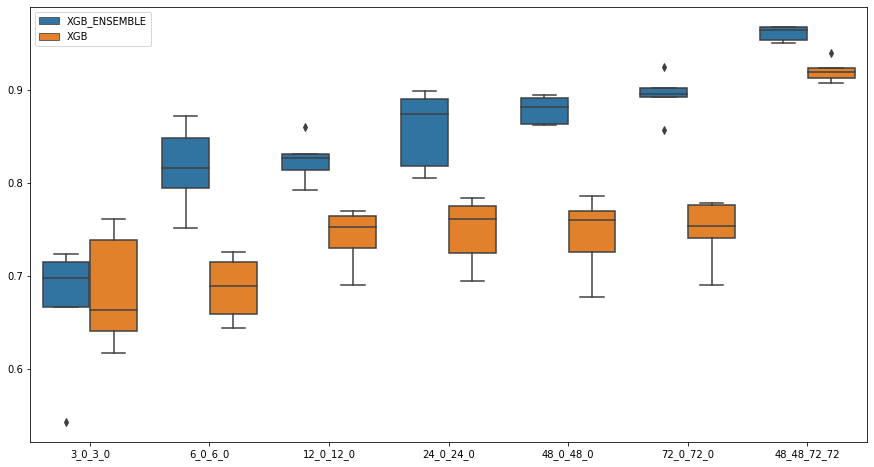

In [267]:
compareOutputModels(
    [
        'sepsis_vb_3_va_0_lb_3_la_0',
        'sepsis_vb_6_va_0_lb_6_la_0',
        'sepsis_vb_12_va_0_lb_12_la_0',
        'sepsis_vb_24_va_0_lb_24_la_0',
        'sepsis_vb_48_va_0_lb_48_la_0',
        'sepsis_vb_72_va_0_lb_72_la_0',
        'sepsis_vb_96_va_0_lb_96_la_0',
        'sepsis_vb_120_va_0_lb_120_la_0',
        'sepsis_vb_48_va_48_lb_72_la_72'
    ],
    windowStart = 0,
    windowEnd = 120
)

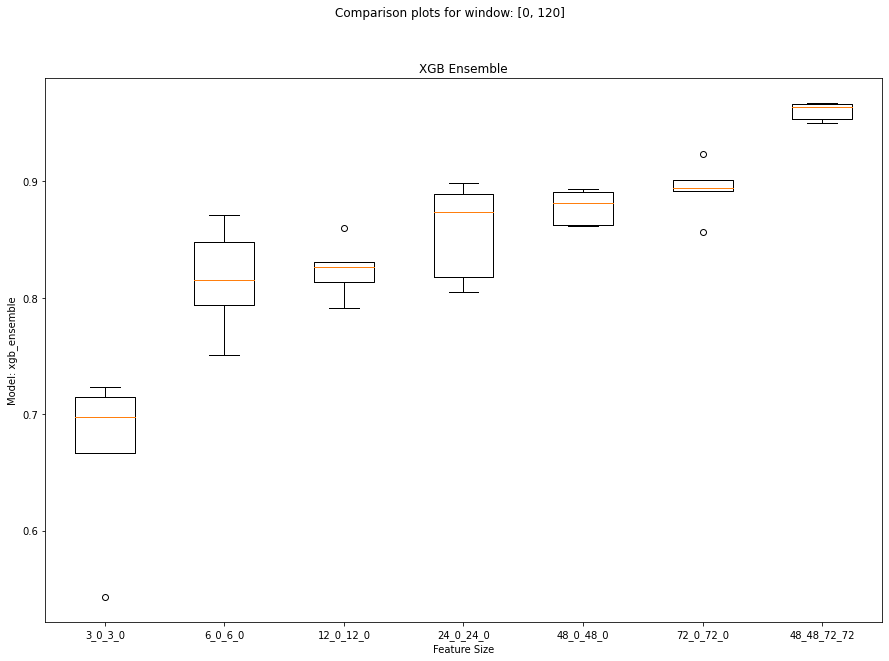

In [268]:
compareOutputWindows(
    [
        'sepsis_vb_3_va_0_lb_3_la_0',
        'sepsis_vb_6_va_0_lb_6_la_0',
        'sepsis_vb_12_va_0_lb_12_la_0',
        'sepsis_vb_24_va_0_lb_24_la_0',
        'sepsis_vb_48_va_0_lb_48_la_0',
        'sepsis_vb_72_va_0_lb_72_la_0',
        'sepsis_vb_96_va_0_lb_96_la_0',
        'sepsis_vb_120_va_0_lb_120_la_0',
        'sepsis_vb_48_va_48_lb_72_la_72'
    ],
    'xgb_ensemble',
    windowStart = 0,
    windowEnd = 120
)